In [1]:
# @hidden
from IPython.display import display 
import numpy as np 
import pandas as pd
from io import BytesIO
import random
import pickle
import requests
import string
import warnings
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

#-----------------Plots
from matplotlib import pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import pylab as pl
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
df = pd.read_excel('data.xlsx')
df.columns = ['underyling', 'short_call_1', 'long_call', 'short_call_2']
df['profit'] = df['short_call_1'] + df['long_call'] + df['short_call_2']

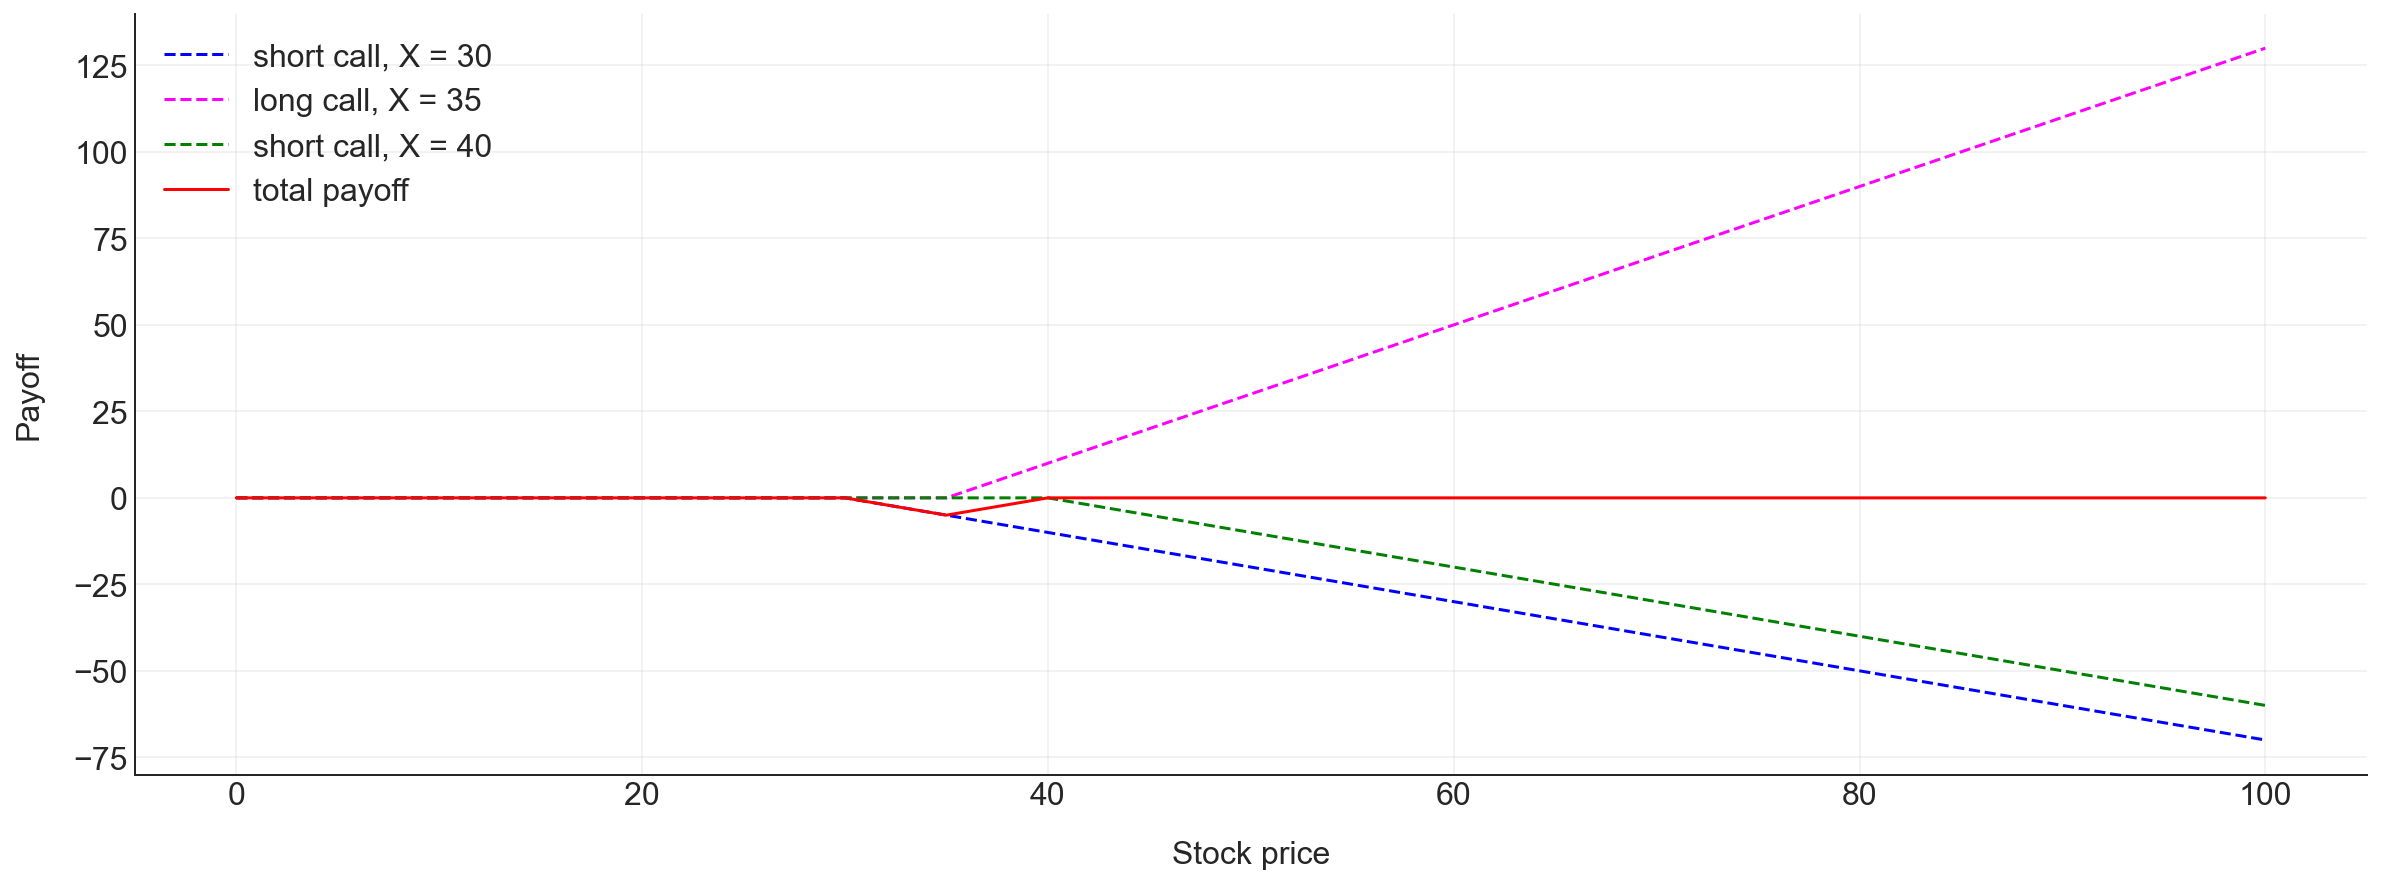

In [5]:
plt.rcParams["figure.figsize"] = (20,7)
fig, ax = plt.subplots()
xi = df['underyling'].values
y1 = df['short_call_1'].values
y2 = df['long_call'].values
y3 = df['short_call_2'].values
y4 = df['profit'].values
plt.plot(xi, y1, linestyle = '--', color='b', label = 'short call, X = 30')
plt.plot(xi, y2, linestyle = '--', color='magenta', label = 'long call, X = 35')
plt.plot(xi, y3, linestyle = '--', color='g', label = 'short call, X = 40')
plt.plot(xi, y4, color='r', label = 'total payoff')
plt.xlabel('Stock price', fontsize = 16, labelpad = 15)
plt.ylabel('Payoff', fontsize = 16, labelpad = 15)
#plt.xticks(np.arange(0, components_amount, step=5))
#plt.title('Number of components needed to explain variance', fontsize=20)
#plt.axhline(y=0.90, color='r', linestyle='--')
#plt.text(2.20, 0.93, '90% cut-off threshold', color = 'red', fontsize=16)
plt.grid(axis='both', alpha=.3)
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(1.0)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(1.0)
plt.legend()
plt.savefig('payoff_diagram.png', dpi = 100, bbox_inches="tight")
plt.show()